In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fandango = pd.read_csv(r"C:\Users\shrey\Desktop\DAPP_Aug2023\DATA\fandango_scrape.csv")

In [3]:
fandango

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


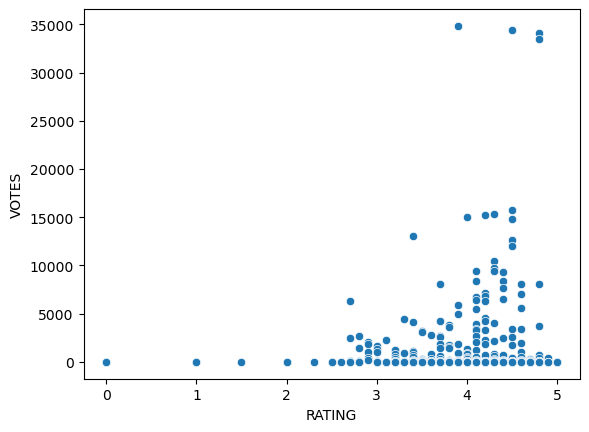

In [6]:
sns.scatterplot(data=fandango,x='RATING',y='VOTES');

In [7]:
fandango.corr()

C:\Users\shrey\AppData\Local\Temp\ipykernel_11712\1316820973.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fandango.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [8]:
fandango['Year'] = fandango['FILM'].apply(lambda x:x.split('(')[-1]).apply(lambda x:x.split(')')[0])

In [9]:
fandango

,FILM,STARS,RATING,VOTES,Year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


<Axes: xlabel='Year', ylabel='count'>

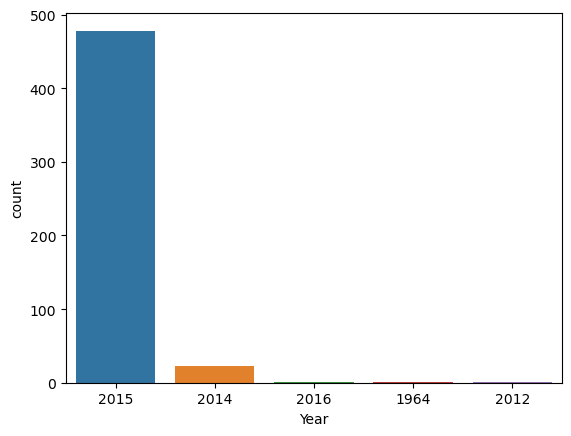

In [10]:
sns.countplot(data = fandango, x = 'Year')

In [12]:
#top 10 movies with highest number of votes
fandango.nlargest(10,'VOTES')[['FILM','VOTES']]

,FILM,VOTES
0,Fifty Shades of Grey (2015),34846
1,Jurassic World (2015),34390
2,American Sniper (2015),34085
3,Furious 7 (2015),33538
4,Inside Out (2015),15749
5,The Hobbit: The Battle of the Five Armies (2014),15337
6,Kingsman: The Secret Service (2015),15205
7,Minions (2015),14998
8,Avengers: Age of Ultron (2015),14846
9,Into the Woods (2014),13055


In [13]:
#movies with zero votes

(fandango['VOTES'] == 0).sum()

69

In [14]:
fandango_new = fandango[fandango['VOTES'] != 0 ]
len(fandango_new)

435

In [15]:
435+69

504

In [16]:
fandango.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'Year'], dtype='object')

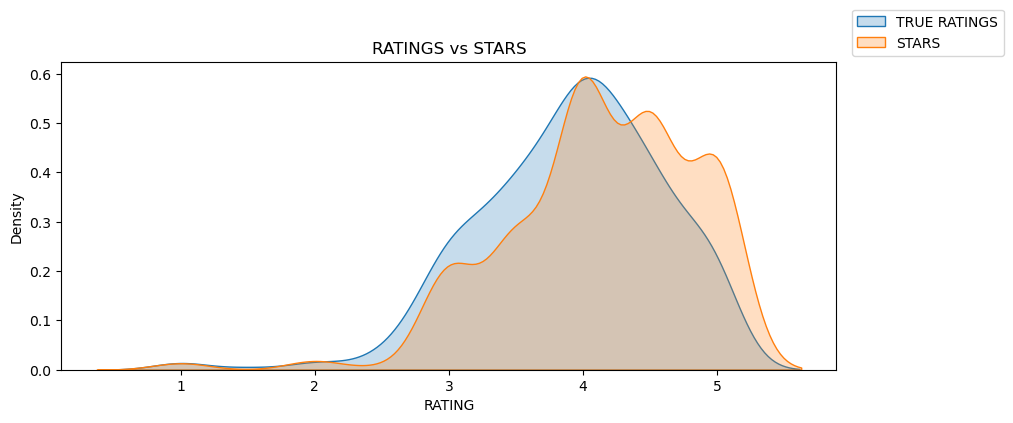

In [22]:
plt.figure(figsize=(10,4))
sns.kdeplot(data=fandango_new,x='RATING', fill = True, label = 'TRUE RATINGS')
sns.kdeplot(data=fandango_new,x='STARS',fill= True,label='STARS')
plt.title('RATINGS vs STARS')
plt.legend(loc=(1.02,1.02))

In [24]:
fandango_new['diff_stars'] = (fandango_new['STARS'] - fandango_new['RATING']).round(2)
fandango_new


C:\Users\shrey\AppData\Local\Temp\ipykernel_11712\2756462108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_new['diff_stars'] = (fandango_new['STARS'] - fandango_new['RATING']).round(2)


,FILM,STARS,RATING,VOTES,Year,diff_stars
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<Axes: xlabel='diff_stars', ylabel='count'>

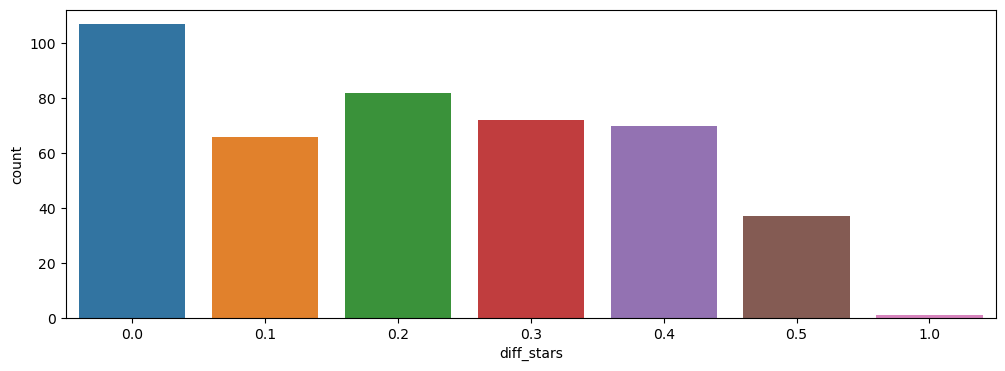

In [26]:
plt.figure(figsize=(12,4))
sns.countplot(data=fandango_new,x='diff_stars')

In [27]:
fandango_new[fandango_new['diff_stars']==1]

,FILM,STARS,RATING,VOTES,Year,diff_stars
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


# Comparison with other Sites

In [28]:
all_sites = pd.read_csv(r"C:\Users\shrey\Desktop\DAPP_Aug2023\DATA\all_sites_scores.csv")
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


In [29]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [30]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

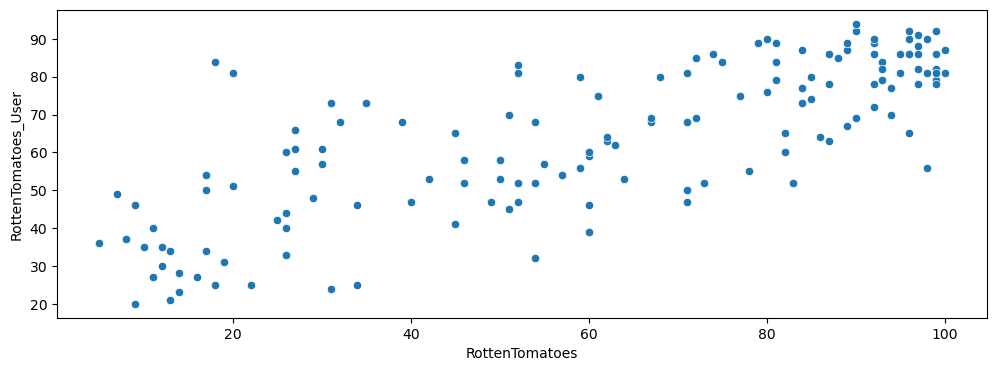

In [32]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')

In [33]:
all_sites['RottenTomatoes_diff'] = all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']
all_sites
#large +ve values means user rated much higher than critics

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


In [37]:
round(all_sites['RottenTomatoes_diff'].abs().mean(),2)

15.1

<Axes: xlabel='RottenTomatoes_diff', ylabel='Count'>

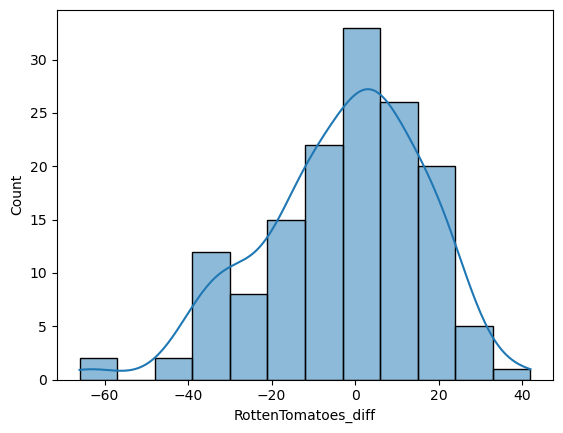

In [36]:
sns.histplot(data=all_sites,x='RottenTomatoes_diff',kde=True)

<Axes: xlabel='RottenTomatoes_diff', ylabel='Count'>

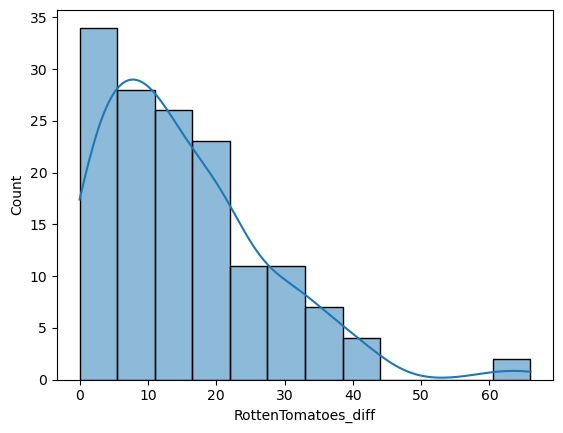

In [38]:
sns.histplot(x=all_sites['RottenTomatoes_diff'].apply(abs),kde=True)

In [42]:
#top 10 movies where critic ratings highers than user would mean -ve values

all_sites.nsmallest(10,'RottenTomatoes_diff')[['FILM','RottenTomatoes_diff']]

,FILM,RottenTomatoes_diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39
132,Max (2015),-38
15,Taken 3 (2015),-37
19,Pixels (2015),-37
51,Entourage (2015),-36
47,Annie (2014),-34


In [43]:
#top 10 movies where user ratings highers than critic would mean +ve values

all_sites.nlargest(10,'RottenTomatoes_diff')[['FILM','RottenTomatoes_diff']]

,FILM,RottenTomatoes_diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24
145,"Kumiko, The Treasure Hunter (2015)",24
90,The SpongeBob Movie: Sponge Out of Water (2015),23
7,Top Five (2014),22
11,Black Sea (2015),22
87,Maggie (2015),22


# MetaCritic

In [44]:
all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'RottenTomatoes_diff'],
      dtype='object')

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

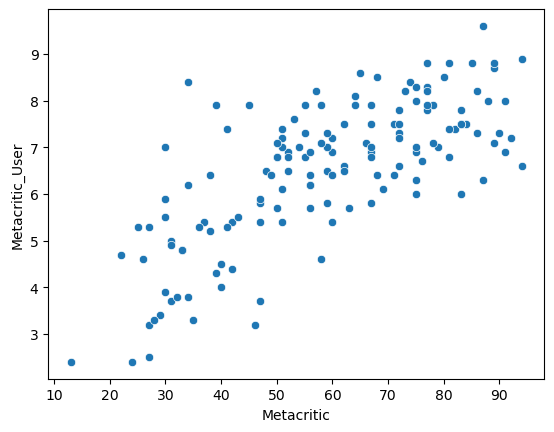

In [45]:
sns.scatterplot(data=all_sites,x= 'Metacritic', y = 'Metacritic_User')

# IMDB

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

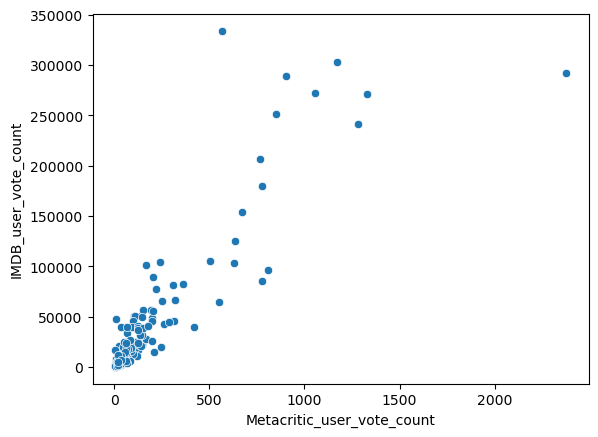

In [46]:
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count' )

In [47]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [48]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


# Fandango vs All

In [51]:
df = pd.merge(fandango,all_sites,on='FILM', how='inner')
df

,FILM,STARS,RATING,VOTES,Year,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   Year                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  RottenTomatoes_diff         145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [57]:
#normalization

df['RT_N'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_N']= np.round(df['RottenTomatoes_User']/20,1)


In [62]:
df['Meta_N'] = np.round(df['Metacritic']/20,1)
df['MetaU_N']= np.round(df['Metacritic_User']/2,1)
df['IMDB_N'] = np.round(df['IMDB']/2,1)
df

,FILM,STARS,RATING,VOTES,Year,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_diff,RT_N,RTU_N,Meta_N,MetaU_N,IMDB_N
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9,4.8,4.3,4.3,3.6,3.7


In [63]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'Year', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'RottenTomatoes_diff', 'RT_N', 'RTU_N', 'Meta_N', 'MetaU_N', 'IMDB_N'],
      dtype='object')

In [64]:
df_N = df[['STARS','RATING','RT_N','RTU_N','Meta_N','MetaU_N','IMDB_N']]
df_N

,STARS,RATING,RT_N,RTU_N,Meta_N,MetaU_N,IMDB_N
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


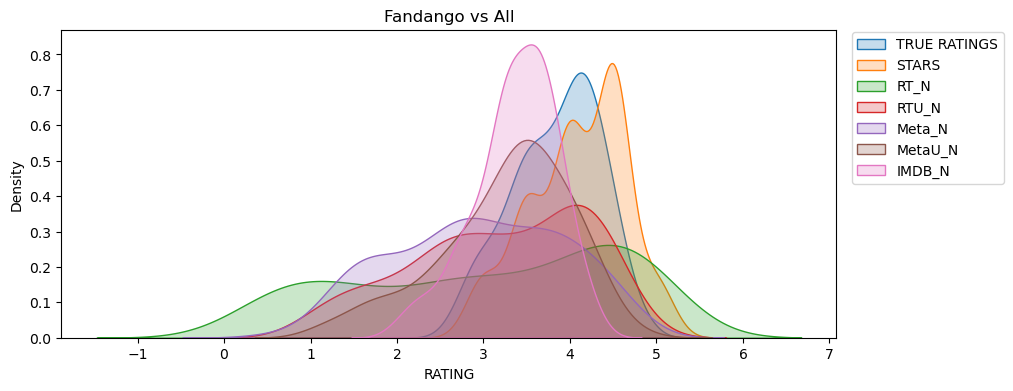

In [66]:
plt.figure(figsize=(10,4))
sns.kdeplot(data=df_N,x='RATING', fill = True, label = 'TRUE RATINGS')
sns.kdeplot(data=df_N,x='STARS',fill= True,label='STARS')
sns.kdeplot(data=df_N,x='RT_N', fill = True, label = 'RT_N')
sns.kdeplot(data=df_N,x='RTU_N',fill= True,label='RTU_N')
sns.kdeplot(data=df_N,x='Meta_N',fill= True,label='Meta_N')
sns.kdeplot(data=df_N,x='MetaU_N', fill = True, label = 'MetaU_N')
sns.kdeplot(data=df_N,x='IMDB_N',fill= True,label='IMDB_N')
plt.title('Fandango vs All')
plt.legend(loc=(1.02,.5))
plt.show()


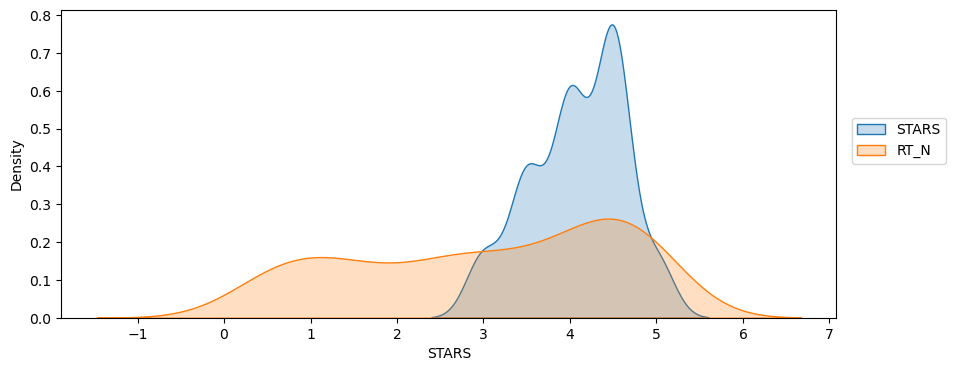

In [67]:
plt.figure(figsize=(10,4))
sns.kdeplot(data=df_N,x='STARS',fill= True,label='STARS')
sns.kdeplot(data=df_N,x='RT_N', fill = True, label = 'RT_N')
plt.legend(loc=(1.02,.5))
plt.show()

<Axes: ylabel='Count'>

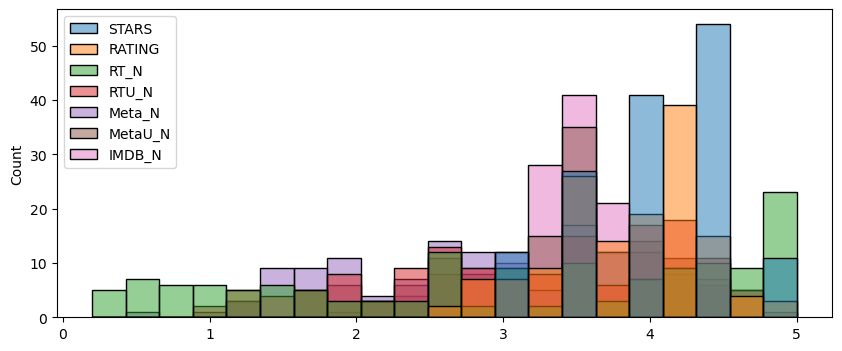

In [68]:
plt.figure(figsize=(10,4))
sns.histplot(df_N)

In [78]:
df_N_F = df[['FILM','STARS','RATING','RT_N','RTU_N','Meta_N','MetaU_N','IMDB_N']]
df_N_F['N_diff_RT_S'] = df['RT_N']-df['STARS'] 
df_N_F

C:\Users\shrey\AppData\Local\Temp\ipykernel_11712\372511723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_N_F['N_diff_RT_S'] = df['RT_N']-df['STARS']


,FILM,STARS,RATING,RT_N,RTU_N,Meta_N,MetaU_N,IMDB_N,N_diff_RT_S
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1,-2.8
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6,-0.9
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7,-1.4
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7,-1.0
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3,0.4
...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,4.4,3.2,3.4,3.2,3.4,0.9
141,The Diary of a Teenage Girl (2015),4.0,3.6,4.8,4.0,4.4,3.2,3.5,0.8
142,The Wrecking Crew (2015),4.5,4.2,4.6,4.2,3.4,3.5,3.9,0.1
143,Tangerine (2015),4.0,3.9,4.8,4.3,4.3,3.6,3.7,0.8


In [74]:
df_N_F_10 = df_N_F.nsmallest(10,'RT_N')
df_N_F_10

,FILM,STARS,RATING,RT_N,RTU_N,Meta_N,MetaU_N,IMDB_N
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


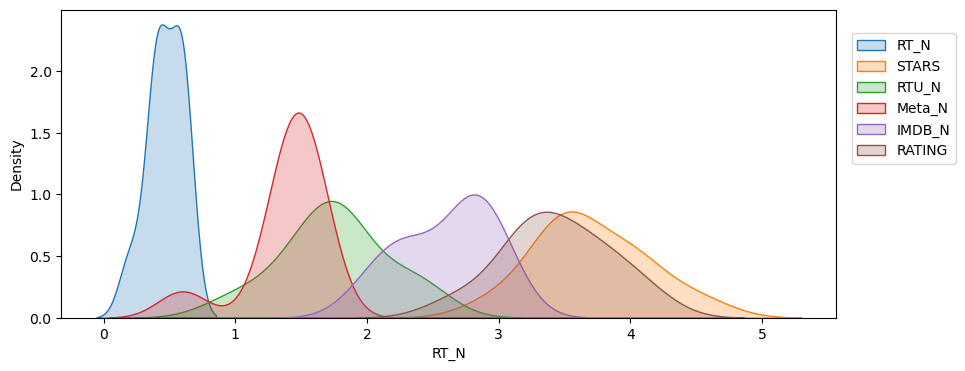

In [73]:
plt.figure(figsize=(10,4))
sns.kdeplot(data=df_N_F_10,x='RT_N', fill = True, label = 'RT_N')
sns.kdeplot(data=df_N_F_10,x='STARS',fill= True,label='STARS')
sns.kdeplot(data=df_N_F_10,x='RTU_N', fill = True, label = 'RTU_N')
sns.kdeplot(data=df_N_F_10,x='Meta_N',fill= True,label='Meta_N')
sns.kdeplot(data=df_N_F_10,x='IMDB_N', fill = True, label = 'IMDB_N')
sns.kdeplot(data=df_N_F_10,x='RATING',fill= True,label='RATING')
plt.legend(loc=(1.02,.5))
plt.show()

# Inferences:

### 1. In KDE plot, we can see that fandango has most uneven distribution compared to other sites. The distribution is much more skewed towards values 4 and 5.
### 2. In Taken 3